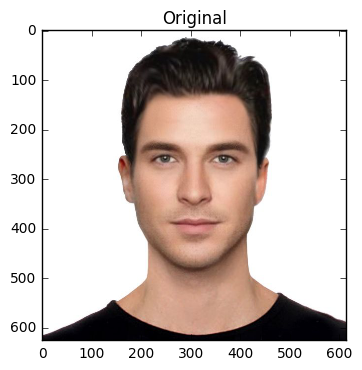

In [21]:
import sys,cv2
import matplotlib.pyplot as plt
%matplotlib inline
image= cv2.imread('sample.jpg')#會用cv2讀取圖片是因為圖片是jpg，matplotlib只能讀取png
#plt.imshow(image) #matplotlib圖片的顏色編碼是BGR
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))#在這邊要將BGR轉成RGB才是我們一般看到的顏色
plt.title('Original') #設定圖片的標題


[[145 133 331 331]]


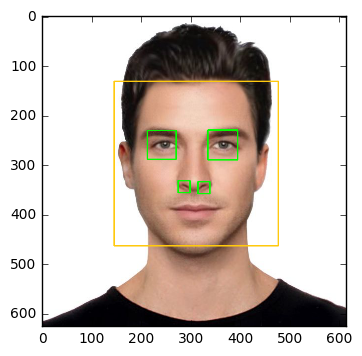

In [22]:
faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml') #匯入臉部辨識的方法
eyeCascade = cv2.CascadeClassifier('haarcascade_eye.xml') #匯入眼睛辨識的方法
grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #轉灰階讓系統做判斷
faces = faceCascade.detectMultiScale(
    grayImage,
    scaleFactor=1.1,
    minNeighbors=5, #依照圖片大小調整
    minSize=(30, 30), 
    flags = cv2.CASCADE_SCALE_IMAGE)
#印出辨識到的臉部位置，值分別是 x:x軸起始點，y:y軸起始點，w:x到結束點的寬度，h:y到結束點的高度
#人臉辨識的範圍建議寬高超過70像素
print faces

#在這裡將辨識到的臉依據位置用方框標示出來
for (x, y, w, h) in faces:
    #畫方框(圖片,起始值,結束值,方框顏色RGB(與matplotlib相反),粗細)
    cv2.rectangle(image, (x,y), (x+w, y+h), (14, 201, 255), 2)

    #將臉部區域轉成灰色再繼續做眼睛辨識
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = image[y:y+h, x:x+w]
    #print(roi_color)
    eyes = eyeCascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2) #畫出眼睛的方框

#plt.imshow(image)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))


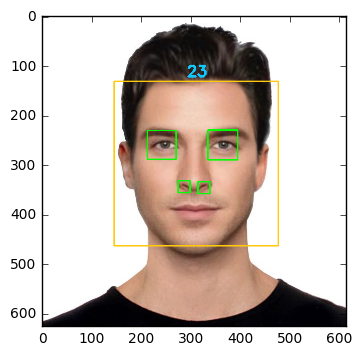

In [23]:
import random
#設定字型
font = cv2.FONT_HERSHEY_SIMPLEX

#隨機加上數字
for (x, y, w, h) in faces:
    cv2.putText(image,str(random.randrange(18, 25)),(x+(w/2)-18,y-10), font, 1, (255,201,14),4) #寫文字
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
